In [1]:
from datetime import datetime

In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\priya\\OneDrive\\Desktop\\Final Project_DS\\final_electronics_dataset_projects.csv",index_col="reviewTime",parse_dates=True)

In [2]:
df.head()

,Unnamed: 0,product_id,category,ratings,reviewerID,Review,helpful_rate,sentiment,review_len,word_count
reviewTime,,,,,,,,,,
2013-06-02,0,0528881469,all electronics,5.0,AO94DHGC771SJ,We got this GPS for my husband who is an (OTR)...,0.00,positive,821.0,152.0
2010-11-25,1,0528881469,all electronics,1.0,AMO214LNFCEI4,"I'm a professional OTR truck driver, and I bou...",0.80,Negative,2193.0,429.0
2010-09-09,2,0528881469,all electronics,3.0,A3N7T0DY83Y4IG,"Well, what can I say. I've had this unit in m...",0.96,Neutral,4622.0,848.0
2010-11-24,3,0528881469,all electronics,2.0,A1H8PY3QHMQQA0,"Not going to write a long review, even thought...",0.90,Negative,2270.0,453.0
2011-09-29,4,0528881469,all electronics,1.0,A24EV6RXELQZ63,I've had mine for a year and here's what we go...,0.00,Negative,1115.0,208.0


In [3]:
df.shape

(1004595, 10)

In [4]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['sentiment'] = labelencoder.fit_transform(df['sentiment'])
df.head()

,product_id,category,ratings,reviewerID,Review,helpful_rate,sentiment,review_len,word_count
reviewTime,,,,,,,,,
2013-06-02,0528881469,all electronics,5.0,AO94DHGC771SJ,We got this GPS for my husband who is an (OTR)...,0.00,2,821.0,152.0
2010-11-25,0528881469,all electronics,1.0,AMO214LNFCEI4,"I'm a professional OTR truck driver, and I bou...",0.80,0,2193.0,429.0
2010-09-09,0528881469,all electronics,3.0,A3N7T0DY83Y4IG,"Well, what can I say. I've had this unit in m...",0.96,1,4622.0,848.0
2010-11-24,0528881469,all electronics,2.0,A1H8PY3QHMQQA0,"Not going to write a long review, even thought...",0.90,0,2270.0,453.0
2011-09-29,0528881469,all electronics,1.0,A24EV6RXELQZ63,I've had mine for a year and here's what we go...,0.00,0,1115.0,208.0


In [6]:
df2=df.resample('M').mean().round(2)
df2
df1 =df2.interpolate(method='linear')
df1

,ratings,helpful_rate,sentiment,review_len,word_count
reviewTime,,,,,
1999-06-30,5.00,0.00,2.00,547.00,97.00
1999-07-31,5.00,0.33,2.00,452.33,83.00
1999-08-31,5.00,0.94,2.00,444.00,74.50
1999-09-30,4.50,0.50,2.00,300.00,54.00
1999-10-31,3.67,0.90,1.50,763.00,133.00
...,...,...,...,...,...
2014-03-31,4.33,0.14,1.73,414.03,76.47
2014-04-30,4.30,0.13,1.72,417.60,77.06
2014-05-31,4.31,0.11,1.72,425.66,78.59


In [7]:
df1.isnull().sum()

ratings         0
helpful_rate    0
sentiment       0
review_len      0
word_count      0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = df1['ratings']
print(data)

reviewTime
1999-06-30    5.00
1999-07-31    5.00
1999-08-31    5.00
1999-09-30    4.50
1999-10-31    3.67
              ... 
2014-03-31    4.33
2014-04-30    4.30
2014-05-31    4.31
2014-06-30    4.28
2014-07-31    4.33
Name: ratings, Length: 182, dtype: float64


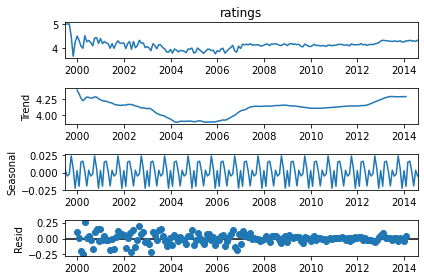

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(data).plot();

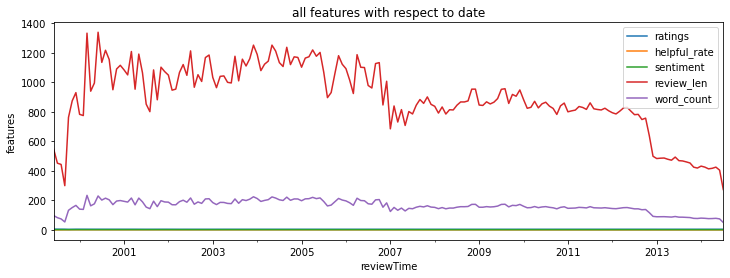

In [10]:
import matplotlib.pyplot as plt
df1.plot(figsize=(12,4))
plt.ylabel('features')
plt.title('all features with respect to date')
plt.show()

df1['category'].plot(figsize=(12,4),color='green')
plt.ylabel('category')
plt.title('product category with respect to date')
plt.show()

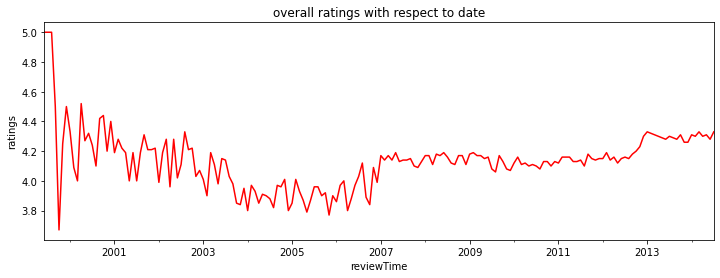

In [11]:
df1['ratings'].plot(figsize=(12,4),color='red')
plt.ylabel('ratings')
plt.title('overall ratings with respect to date')
plt.show()

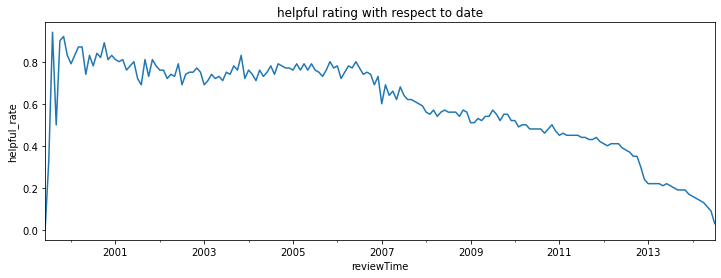

In [12]:
df1['helpful_rate'].plot(figsize=(12,4))
plt.ylabel('helpful_rate')
plt.title('helpful rating with respect to date')
plt.show()

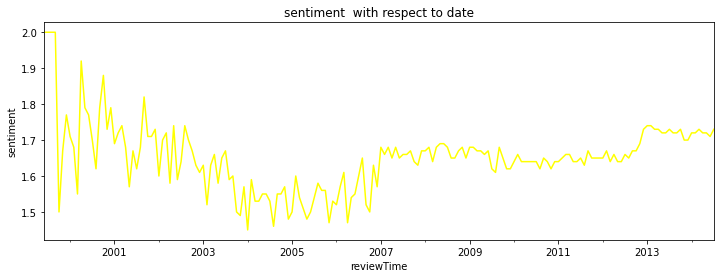

In [13]:
df1['sentiment'].plot(figsize=(12,4),color='yellow')
plt.ylabel('sentiment')
plt.title('sentiment  with respect to date')
plt.show()

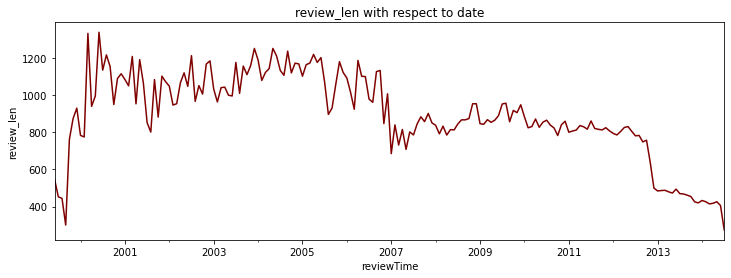

In [15]:
df1['review_len'].plot(figsize=(12,4),color='maroon')
plt.ylabel('review_len')
plt.title('review_len with respect to date')
plt.show()

# check Stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [17]:
def checkStationarity(data):
    pvalue=adfuller(data)[1]
    if (pvalue < 0.05):
        ret = "pvalue={}. Model is stationary. Proceed to model building".format(pvalue)
    else:
        ret = "pvalue={}. Model is not stationary.Difference".format(pvalue)
    return(ret)  

In [18]:
checkStationarity(data)

'pvalue=0.48241546011149267. Model is not stationary.Difference'

In [19]:
data_diff=data-data.shift()
data_diff

reviewTime
1999-06-30     NaN
1999-07-31    0.00
1999-08-31    0.00
1999-09-30   -0.50
1999-10-31   -0.83
              ... 
2014-03-31    0.03
2014-04-30   -0.03
2014-05-31    0.01
2014-06-30   -0.03
2014-07-31    0.05
Name: ratings, Length: 182, dtype: float64

In [20]:
pd.DataFrame({'actual':data,'difference':data_diff})

,actual,difference
reviewTime,,
1999-06-30,5.00,NaN
1999-07-31,5.00,0.00
1999-08-31,5.00,0.00
1999-09-30,4.50,-0.50
1999-10-31,3.67,-0.83
...,...,...
2014-03-31,4.33,0.03
2014-04-30,4.30,-0.03
2014-05-31,4.31,0.01


In [21]:
checkStationarity(data_diff[1:].dropna())

'pvalue=1.3000714365558402e-09. Model is stationary. Proceed to model building'

In [22]:
#method2 :remove the NAN value from the data
print("record count before deleting nulls={}".format(len(data_diff)))

data_diff.dropna(inplace=True)
#remove the NAN value from the data
print("record count after deleting nulls={}".format(len(data_diff)))

record count before deleting nulls=182
record count after deleting nulls=181


# ACF and PACF

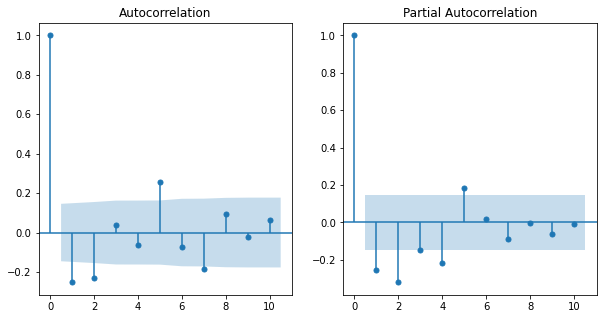

In [23]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sm.graphics.tsa.plot_acf(data_diff.values.squeeze(), lags=10, ax=ax[0])
sm.graphics.tsa.plot_pacf(data_diff.values.squeeze(), lags=10, ax=ax[1])
plt.show()

In [25]:
p=5;q=5

# train test split

In [26]:
ss=int(0.9*len(data))
train=data.iloc[:ss]
test=data.iloc[ss:]
print("train={},test={}".format(len(train),len(test)))
# from top to bottom

train=163,test=19


 # ARMA Model:

In [27]:
from statsmodels.tsa.arima.model import ARIMA 

In [28]:
p=1; q=1
arma_model= ARIMA(train,order=(p,0,q)).fit() 
arma_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                ratings   No. Observations:                  163
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  94.587
Date:                Sun, 06 Mar 2022   AIC                           -181.174
Time:                        18:19:32   BIC                           -168.799
Sample:                    06-30-1999   HQIC                          -176.150
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2346      0.156     27.065      0.000       3.928       4.541
ar.L1          0.9678      0.019     50.380      0.000       0.930       1.005
ma.L1         -0.5174      0.061     -8.442      0.000      -0.638      -0.397
sigma2         0.0182      0.001     16.584      0.000       0.016       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):              3123.44
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            -2.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
p=5; q=5
arma_model1= ARIMA(train,order=(p,0,q)).fit() 
arma_model1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                ratings   No. Observations:                  163
Model:                 ARIMA(5, 0, 5)   Log Likelihood                 110.277
Date:                Sun, 06 Mar 2022   AIC                           -196.553
Time:                        18:19:40   BIC                           -159.428
Sample:                    06-30-1999   HQIC                          -181.481
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3170      0.204     21.207      0.000       3.918       4.716
ar.L1          0.0195      0.111      0.175      0.861      -0.199       0.238
ar.L2         -0.1844      0.086     -2.137      0.033      -0.354      -0.015
ar.L3          0.2166      0.084      2.583      0.010       0.052       0.381
ar.L4          0.1366      0.093      1.469      0.142      -0.046       0.319
ar.L5          0.7417      0.112      6.625      0.000       0.522       0.961
ma.L1          0.5485      0.133      4.136      0.000       0.289       0.808
ma.L2          0.4573      0.141      3.239      0.001       0.181       0.734
ma.L3          0.1885      0.147      1.284      0.199      -0.099       0.476
ma.L4          0.0142      0.140      0.102      0.919      -0.260       0.288
ma.L5         -0.2113      0.140     -1.511      0.131      -0.485       0.063
sigma2         0.0148      0.001     12.863      0.000       0.013       0.017
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):              1518.39
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                            -2.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
prediction_arma1=arma_model1.predict(0,len(test)-1)
prediction_arma1

1999-06-30    4.317029
1999-07-31    4.911200
1999-08-31    4.925694
1999-09-30    4.950530
1999-10-31    4.672835
1999-11-30    4.415103
1999-12-31    4.579377
2000-01-31    4.453301
2000-02-29    4.242028
2000-03-31    3.867439
2000-04-30    4.344368
2000-05-31    4.609963
2000-06-30    4.127763
2000-07-31    4.174006
2000-08-31    4.132692
2000-09-30    4.478524
2000-10-31    4.347469
2000-11-30    4.223531
2000-12-31    4.231571
Freq: M, Name: predicted_mean, dtype: float64

In [32]:
# actual vs predicted values
# print("test = {}, predicted = {}".format(len(test), len(predictions) ))
actual = []; pred = [] 
for i in range(len(prediction_arma1)):
    actual.append(train[i]) 
    pred.append(prediction_arma1[i]) 
df_res11= pd.DataFrame({'actual':actual, 'predicted':pred}) 
df_res11['err'] = df_res11.actual - df_res11.predicted
print(df_res11) #MAE Mean(|E|)

    actual  predicted       err
0     5.00   4.317029  0.682971
1     5.00   4.911200  0.088800
2     5.00   4.925694  0.074306
3     4.50   4.950530 -0.450530
4     3.67   4.672835 -1.002835
5     4.25   4.415103 -0.165103
6     4.50   4.579377 -0.079377
7     4.33   4.453301 -0.123301
8     4.09   4.242028 -0.152028
9     4.00   3.867439  0.132561
10    4.52   4.344368  0.175632
11    4.27   4.609963 -0.339963
12    4.32   4.127763  0.192237
13    4.24   4.174006  0.065994
14    4.10   4.132692 -0.032692
15    4.42   4.478524 -0.058524
16    4.44   4.347469  0.092531
17    4.20   4.223531 -0.023531
18    4.40   4.231571  0.168429


In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error 
msg1 = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')' 
mse11 = mean_squared_error(df_res11.actual, df_res11.predicted) 
print(msg1 + "\n\tMSE = {}\n\tRMSE = {}".format(mse11,np.sqrt(mse11)))

ARMA Model. Order=(5,5)
	MSE = 0.10566681237411665
	RMSE = 0.3250643203646267


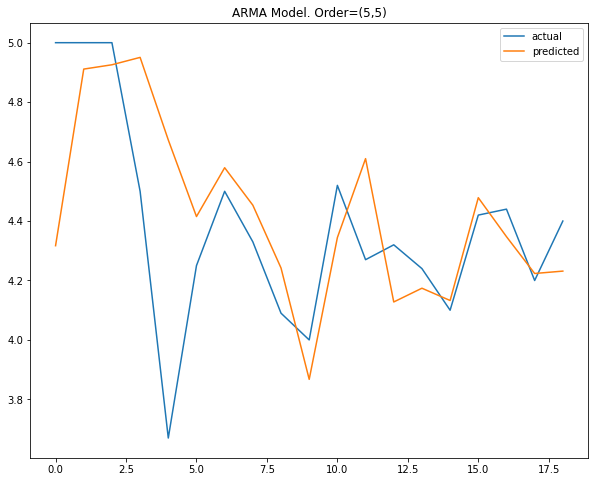

In [34]:
df_res11.actual.plot(figsize=(10,8),legend=True) 
df_res11.predicted.plot(legend=True) 
plt.title(msg1)
plt.show()

In [35]:
fcast_arma1 =arma_model1.predict(start=len(train), end=len(train)+12, typ='levels') 
print(fcast_arma1)

2013-01-31    4.235623
2013-02-28    4.223339
2013-03-31    4.237112
2013-04-30    4.240132
2013-05-31    4.268700
2013-06-30    4.239788
2013-07-31    4.227380
2013-08-31    4.249286
2013-09-30    4.251881
2013-10-31    4.262444
2013-11-30    4.243777
2013-12-31    4.235816
2014-01-31    4.257994
Freq: M, Name: predicted_mean, dtype: float64


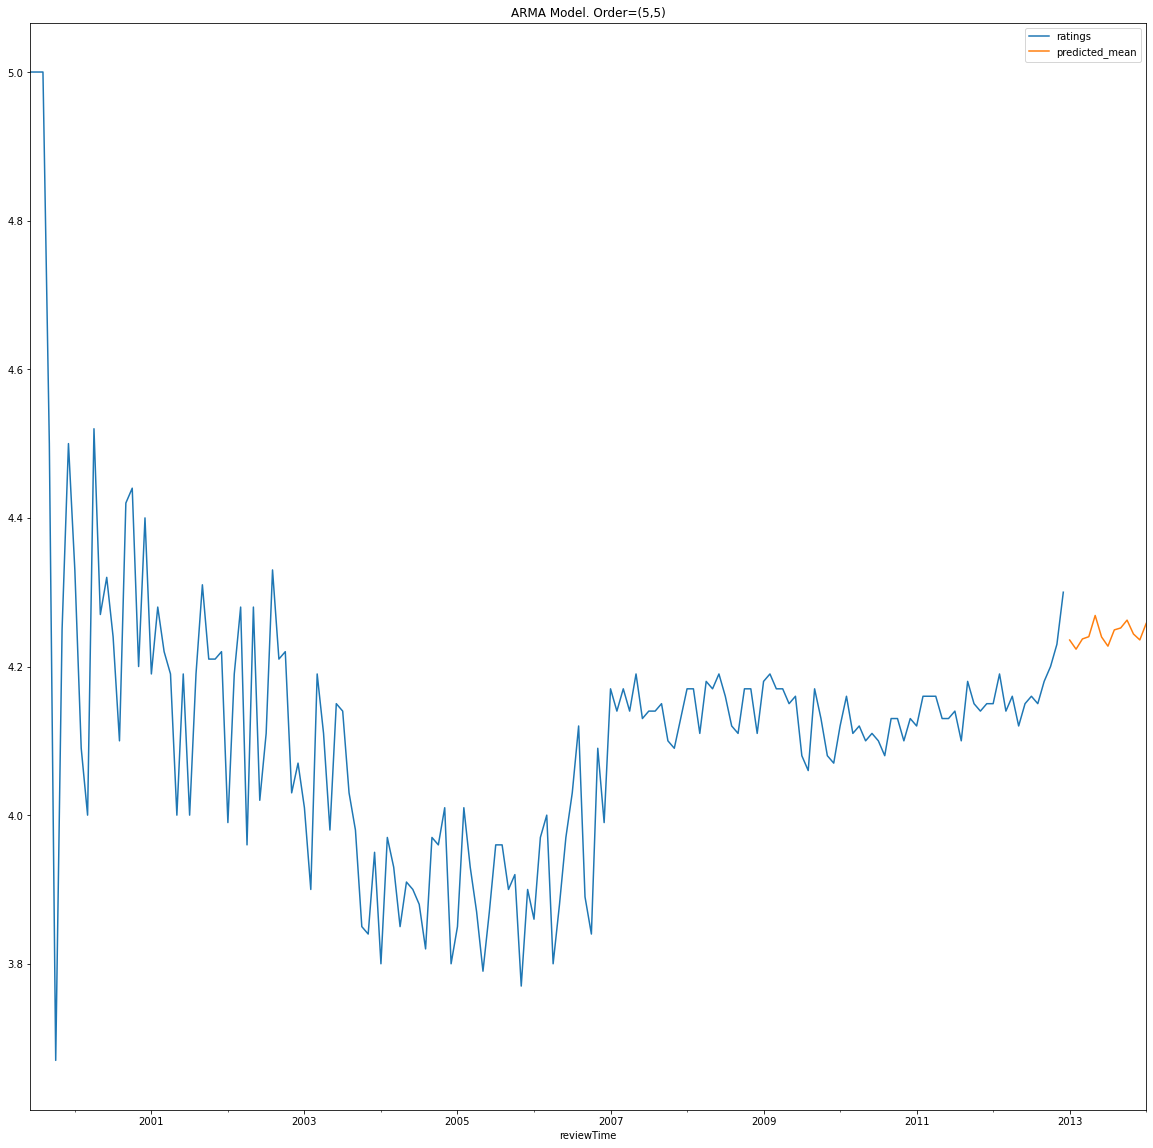

In [36]:
train.plot(figsize=(20,20),legend=True) 
fcast_arma1.plot(legend=True) 
plt.title(msg1)
plt.show()

# Predict the test data using the model

In [37]:
prediction_arma=arma_model.predict(0,len(test)-1)
prediction_arma

1999-06-30    4.234639
1999-07-31    4.881198
1999-08-31    4.924325
1999-09-30    4.937921
1999-10-31    4.715434
1999-11-30    4.227401
1999-12-31    4.237823
2000-01-31    4.355846
2000-02-29    4.340303
2000-03-31    4.224155
2000-04-30    4.123523
2000-05-31    4.305688
2000-06-30    4.287327
2000-07-31    4.300349
2000-08-31    4.271051
2000-09-30    4.192831
2000-10-31    4.296503
2000-11-30    4.359149
2000-12-31    4.283456
Freq: M, Name: predicted_mean, dtype: float64

# Collate actual, predicted, and error values together

In [38]:
# actual vs predicted values
# print("test = {}, predicted = {}".format(len(test), len(predictions) ))
actual = []; pred = [] 
for i in range(len(prediction_arma)):
    actual.append(train[i]) 
    pred.append(prediction_arma[i]) 
df_res1= pd.DataFrame({'actual':actual, 'predicted':pred}) 
df_res1['err'] = df_res1.actual - df_res1.predicted
print(df_res1) #MAE Mean(|E|)

    actual  predicted       err
0     5.00   4.234639  0.765361
1     5.00   4.881198  0.118802
2     5.00   4.924325  0.075675
3     4.50   4.937921 -0.437921
4     3.67   4.715434 -1.045434
5     4.25   4.227401  0.022599
6     4.50   4.237823  0.262177
7     4.33   4.355846 -0.025846
8     4.09   4.340303 -0.250303
9     4.00   4.224155 -0.224155
10    4.52   4.123523  0.396477
11    4.27   4.305688 -0.035688
12    4.32   4.287327  0.032673
13    4.24   4.300349 -0.060349
14    4.10   4.271051 -0.171051
15    4.42   4.192831  0.227169
16    4.44   4.296503  0.143497
17    4.20   4.359149 -0.159149
18    4.40   4.283456  0.116544


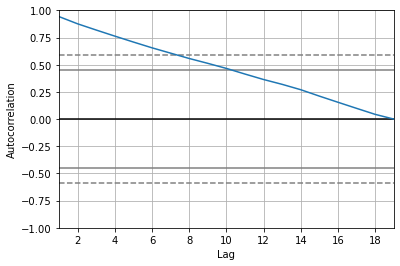

In [39]:
pd.plotting.autocorrelation_plot(df_res1).plot()
plt.show()

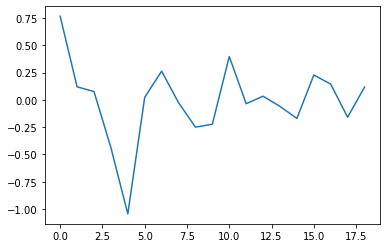

In [40]:
df_res1.err.plot()
plt.show()

In [41]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(arma_model.resid,lags=[1],return_df=True)['lb_pvalue'].values 
if pvalue < 0.05: 
    print("Reject H0. Bad model") 
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


# calculate error terms

In [42]:
from sklearn.metrics import mean_squared_error 
msg = 'ARMA Model1. Order=(' + str(p) + ',' + str(q) + ')' 
mse1 = mean_squared_error(df_res1.actual, df_res1.predicted) 
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model1. Order=(5,5)
	MSE = 0.12508856026218237
	RMSE = 0.3536786115418663


# Plot actual vs. predicted values

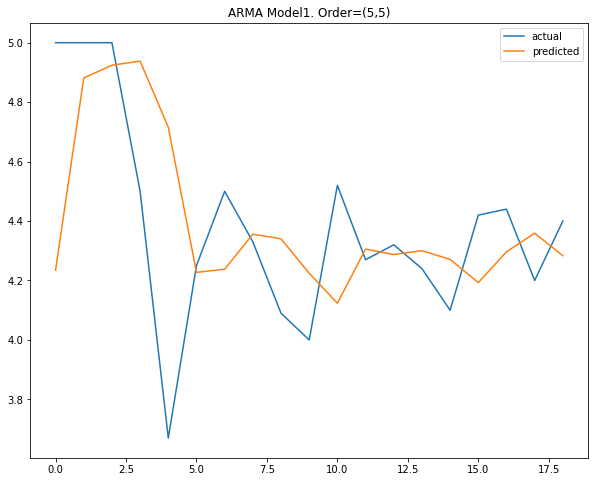

In [43]:
df_res1.actual.plot(figsize=(10,8),legend=True) 
df_res1.predicted.plot(legend=True) 
plt.title(msg)
plt.show()

# Forecast the future data using the model

In [44]:
fcast_arma =arma_model.predict(start=len(train), end=len(train)+10, typ='levels') 
print(fcast_arma)

2013-01-31    4.249821
2013-02-28    4.249333
2013-03-31    4.248860
2013-04-30    4.248402
2013-05-31    4.247960
2013-06-30    4.247531
2013-07-31    4.247116
2013-08-31    4.246715
2013-09-30    4.246326
2013-10-31    4.245950
2013-11-30    4.245586
Freq: M, Name: predicted_mean, dtype: float64


# Visualize the forecast

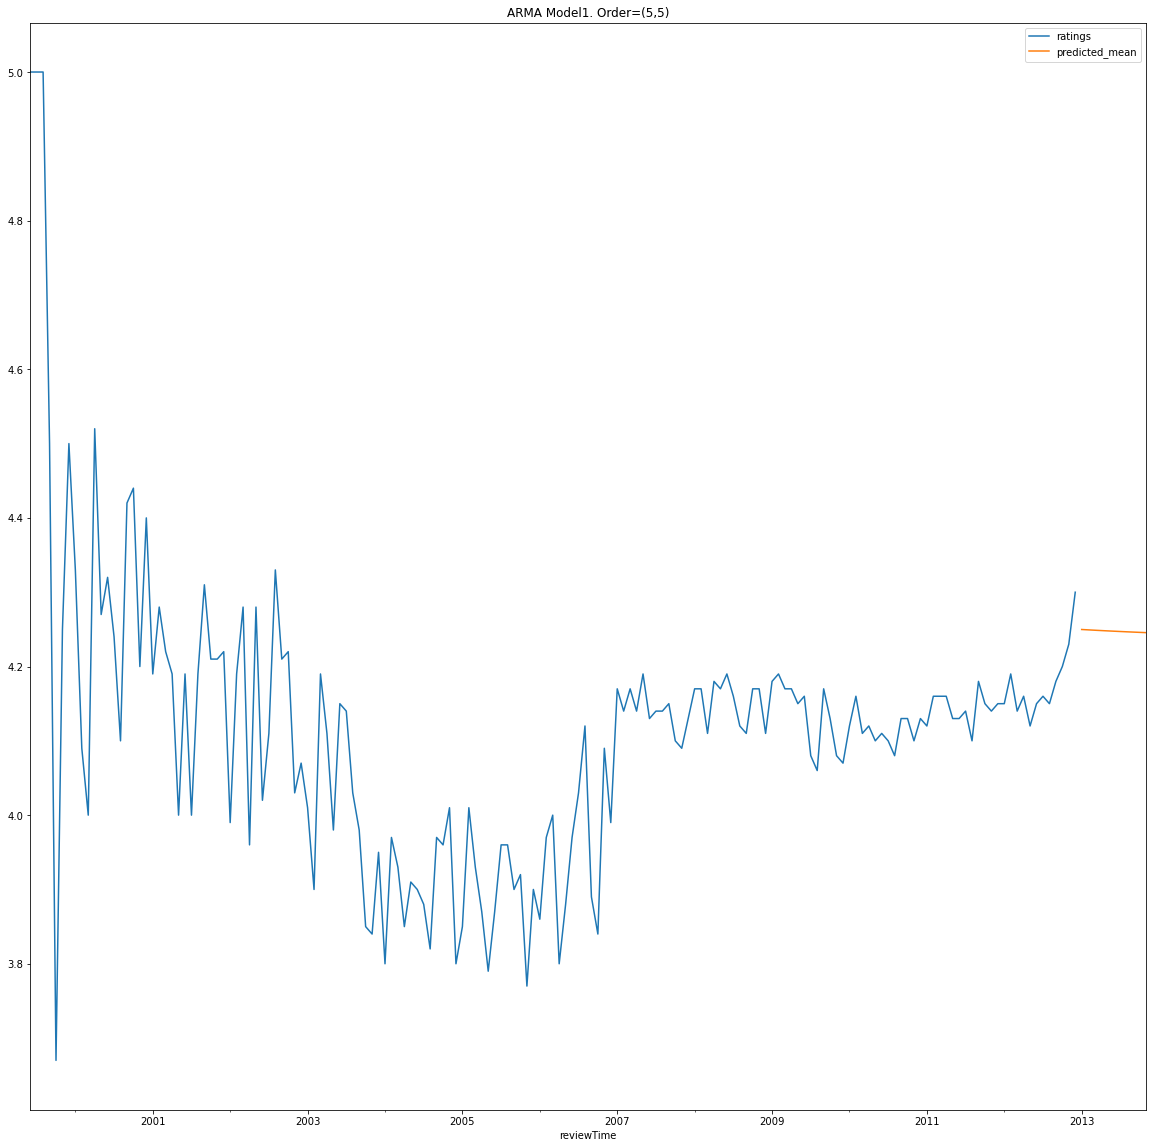

In [45]:
train.plot(figsize=(20,20),legend=True) 
fcast_arma.plot(legend=True) 
plt.title(msg)
plt.show()

In [46]:
# auto ARIMA (to help in the selection of p,d,q)
from pmdarima.arima import auto_arima
m = auto_arima(train,start_p=1,max_p=8, start_q=1,max_q=5, seasonal=False, trace=True)
print(m.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-188.009, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-158.660, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-167.349, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-182.725, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-160.519, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-189.083, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-182.606, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-187.187, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-189.583, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-191.102, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-191.054, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-189.592, Time=0.26 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-190.220, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-187.605, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0]          

# Arima model

In [47]:
p=2; q=3; d=1
arima_model= ARIMA(train,order=(p,1,q)).fit() 
arima_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                ratings   No. Observations:                  163
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 102.430
Date:                Sun, 06 Mar 2022   AIC                           -192.860
Time:                        18:20:06   BIC                           -174.334
Sample:                    06-30-1999   HQIC                          -185.338
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6070      0.047     13.005      0.000       0.516       0.699
ar.L2         -0.9338      0.039    -23.747      0.000      -1.011      -0.857
ma.L1         -1.0823      0.104    -10.411      0.000      -1.286      -0.879
ma.L2          1.0272      0.138      7.440      0.000       0.757       1.298
ma.L3         -0.3730      0.098     -3.823      0.000      -0.564      -0.182
sigma2         0.0166      0.001     15.852      0.000       0.015       0.019
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):              2593.40
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            -2.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predict the test data using the model

In [48]:
prediction_arima=arima_model.predict(0,len(train)-1)
prediction_arima

1999-06-30    0.000000
1999-07-31    5.000000
1999-08-31    5.000000
1999-09-30    5.000000
1999-10-31    4.689761
                ...   
2012-08-31    4.153396
2012-09-30    4.139045
2012-10-31    4.158780
2012-11-30    4.182849
2012-12-31    4.205566
Freq: M, Name: predicted_mean, Length: 163, dtype: float64

# Collate actual, predicted, and error values together

In [49]:
# actual vs predicted values
# print("test = {}, predicted = {}".format(len(test), len(predictions) ))
actual = []; pred= [] 
for i in range(len(prediction_arima)):
    actual.append(train[i]) 
    pred.append(prediction_arima[i]) 
df_res2 = pd.DataFrame({'actual':actual, 'predicted':pred}) 
df_res2['err'] = df_res2.actual- df_res2.predicted
print(df_res2) #MAE Mean(|E|)

     actual  predicted           err
0      5.00   0.000000  5.000000e+00
1      5.00   5.000000  2.451949e-08
2      5.00   5.000000  3.774814e-08
3      4.50   5.000000 -5.000000e-01
4      3.67   4.689761 -1.019761e+00
..      ...        ...           ...
158    4.15   4.153396 -3.396347e-03
159    4.18   4.139045  4.095508e-02
160    4.20   4.158780  4.121993e-02
161    4.23   4.182849  4.715062e-02
162    4.30   4.205566  9.443436e-02

[163 rows x 3 columns]


# error plot

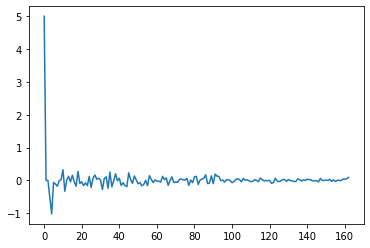

In [50]:
df_res2.err.plot()
plt.show()

# Autocorrelation plot

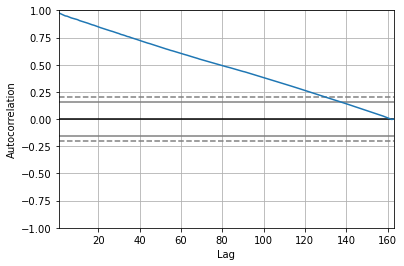

In [51]:
pd.plotting.autocorrelation_plot(df_res2).plot()
plt.show()

# Box-Jenkins test to check model's goodness

In [52]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(arima_model.resid,lags=[1],return_df=True)['lb_pvalue'].values 
if pvalue < 0.05: 
    print("Reject H0. Bad model") 
else:
    print("Fail-to-Reject H0. Good model")
# LJung-Box test

Fail-to-Reject H0. Good model


# Calculate error terms

In [53]:
# MSE
msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(q) + ')' 
mse1 = mean_squared_error(df_res2.actual, df_res2.predicted) 
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARIMA Model. Order=(2,3)
	MSE = 0.17070257196966643
	RMSE = 0.41316167776025214


# Plot actual vs. predicted values

182 193


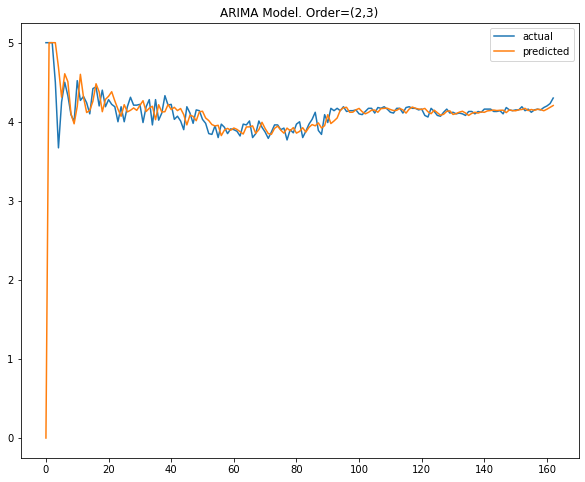

In [54]:
df_res2.actual.plot(figsize=(10,8),legend=True) 
df_res2.predicted.plot(legend=True) 
plt.title(msg)
print(len(data), len(data)+11)

# Forecast the future data using the model

In [55]:
fcast1_arima = arima_model.predict(start=len(train), end=len(train)+50, typ='levels') 
print(fcast1_arima)

2013-01-31    4.245326
2013-02-28    4.226185
2013-03-31    4.230391
2013-04-30    4.250818
2013-05-31    4.259290
2013-06-30    4.245359
2013-07-31    4.228991
2013-08-31    4.232063
2013-09-30    4.249213
2013-10-31    4.256755
2013-11-30    4.245318
2013-12-31    4.231334
2014-01-31    4.233524
2014-02-28    4.247911
2014-03-31    4.254601
2014-04-30    4.245226
2014-05-31    4.233289
2014-06-30    4.234796
2014-07-31    4.246858
2014-08-31    4.252773
2014-09-30    4.245100
2014-10-31    4.234919
2014-11-30    4.235904
2014-12-31    4.246008
2015-01-31    4.251223
2015-02-28    4.244953
2015-03-31    4.236278
2015-04-30    4.236866
2015-05-31    4.245324
2015-06-30    4.249909
2015-07-31    4.244794
2015-08-31    4.237408
2015-09-30    4.237700
2015-10-31    4.244775
2015-11-30    4.248797
2015-12-31    4.244632
2016-01-31    4.238348
2016-02-29    4.238423
2016-03-31    4.244336
2016-04-30    4.247855
2016-05-31    4.244471
2016-06-30    4.239129
2016-07-31    4.239047
2016-08-31 

# Visualize the forecast

Text(0.5, 1.0, 'ARIMA Model. Order=(2,3)')

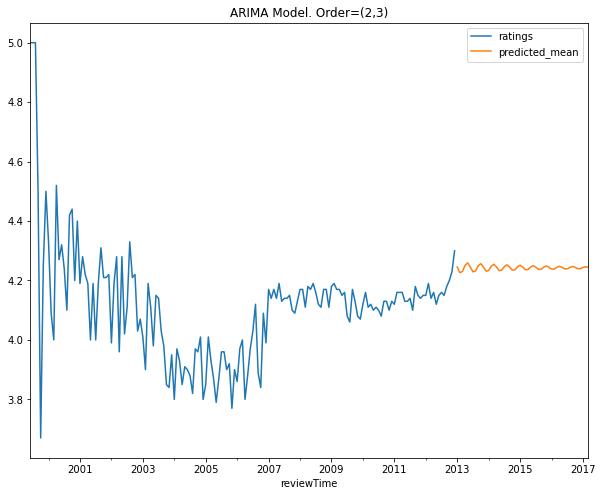

In [56]:
# forecast into the future
train.plot(figsize=(10,8),legend=True)
fcast1_arima.plot(legend=True)
plt.title(msg)

# SARIMA Model

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [58]:
model_sarima = SARIMAX(train, order=(2,1,3), seasonal_order=(1,1,1,30)).fit()
model_sarima.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              ratings   No. Observations:                  163
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 30)   Log Likelihood                  82.608
Date:                              Sun, 06 Mar 2022   AIC                           -149.216
Time:                                      18:20:17   BIC                           -126.153
Sample:                                  06-30-1999   HQIC                          -139.844
                                       - 12-31-2012                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7830      0.057     13.784      0.000       0.672       0.894
ar.L2         -0.8327      0.042    -19.973      0.000      -0.914      -0.751
ma.L1         -1.0193      0.097    -10.481      0.000      -1.210      -0.829
ma.L2          0.6942      0.131      5.284      0.000       0.437       0.952
ma.L3          0.1646      0.089      1.841      0.066      -0.011       0.340
ar.S.L30      -0.1677      2.339     -0.072      0.943      -4.752       4.417
ma.S.L30       0.1085      2.347      0.046      0.963      -4.492       4.709
sigma2         0.0163      0.002      9.084      0.000       0.013       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                34.70
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predict the test data using the model

In [59]:
prediction_sarima=model_sarima.predict(0,len(test)-1)
prediction_sarima

1999-06-30    0.00
1999-07-31    5.00
1999-08-31    5.00
1999-09-30    5.00
1999-10-31    4.50
1999-11-30    3.67
1999-12-31    4.25
2000-01-31    4.50
2000-02-29    4.33
2000-03-31    4.09
2000-04-30    4.00
2000-05-31    4.52
2000-06-30    4.27
2000-07-31    4.32
2000-08-31    4.24
2000-09-30    4.10
2000-10-31    4.42
2000-11-30    4.44
2000-12-31    4.20
Freq: M, Name: predicted_mean, dtype: float64

# Collate actual, predicted, and error values together

In [60]:
# actual vs predicted values
# print("test = {}, predicted = {}".format(len(test), len(predictions) ))
actual = []; pred= [] 
for i in range(len(prediction_sarima)):
    actual.append(train[i]) 
    pred.append(prediction_sarima[i]) 
df_res3 = pd.DataFrame({'actual':actual, 'predicted':pred}) 
df_res3['err'] = df_res3.actual- df_res3.predicted
print(df_res3) #MAE Mean(|E|)

    actual  predicted           err
0     5.00       0.00  5.000000e+00
1     5.00       5.00 -3.999956e-10
2     5.00       5.00  2.746487e-08
3     4.50       5.00 -5.000000e-01
4     3.67       4.50 -8.300000e-01
5     4.25       3.67  5.800000e-01
6     4.50       4.25  2.500000e-01
7     4.33       4.50 -1.700000e-01
8     4.09       4.33 -2.400000e-01
9     4.00       4.09 -8.999999e-02
10    4.52       4.00  5.200000e-01
11    4.27       4.52 -2.500000e-01
12    4.32       4.27  5.000000e-02
13    4.24       4.32 -7.999998e-02
14    4.10       4.24 -1.400000e-01
15    4.42       4.10  3.200000e-01
16    4.44       4.42  1.999998e-02
17    4.20       4.44 -2.400000e-01
18    4.40       4.20  2.000000e-01


# error plot

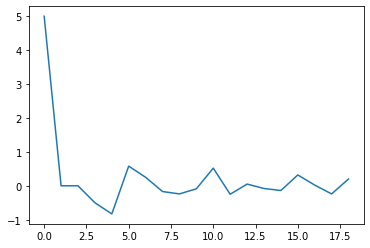

In [61]:
df_res3.err.plot()
plt.show()

# Box-Jenkins test to check model's goodness

In [62]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(model_sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values 
if pvalue < 0.05: 
    print("Reject H0. Bad model") 
else:
    print("Fail-to-Reject H0. Good model")
# LJung-Box test

Fail-to-Reject H0. Good model


# Calculate error terms

In [63]:
# MSE
msg = 'SARIMA Model. Order=(' + str(p) + ',' + str(q) + ')' 
mse1 = mean_squared_error(df_res3.actual, df_res3.predicted) 
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

SARIMA Model. Order=(2,3)
	MSE = 1.4207473645389104
	RMSE = 1.1919510747253472


# Plot actual vs. predicted values

163 174


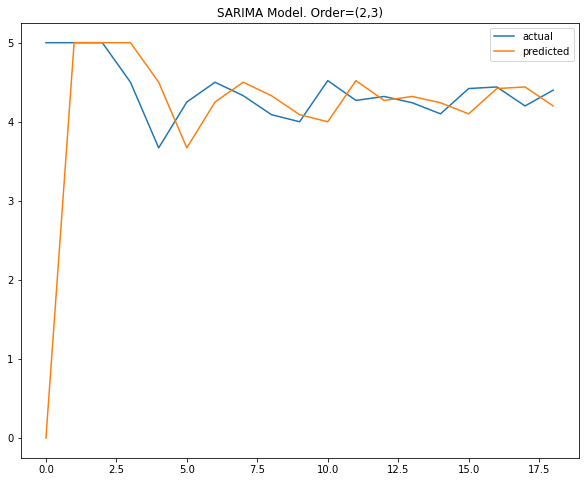

In [64]:
df_res3.actual.plot(figsize=(10,8),legend=True) 
df_res3.predicted.plot(legend=True) 
plt.title(msg)
print(len(train), len(train)+11)

# Forecast the future data using the model

In [65]:
fcast1_sarima = model_sarima.predict(start=len(train), end=len(train)+12, typ='levels') 
print(fcast1_sarima)

2013-01-31    4.244597
2013-02-28    4.213964
2013-03-31    4.303665
2013-04-30    4.353831
2013-05-31    4.323493
2013-06-30    4.312188
2013-07-31    4.271797
2013-08-31    4.316315
2013-09-30    4.347949
2013-10-31    4.370039
2013-11-30    4.327330
2013-12-31    4.297911
2014-01-31    4.303475
Freq: M, Name: predicted_mean, dtype: float64


# Visualize the forecast

Text(0.5, 1.0, 'SARIMA Model. Order=(2,3)')

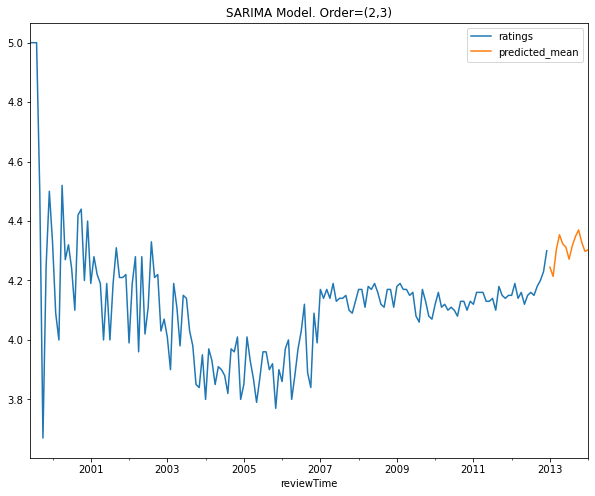

In [66]:
# forecast into the future
train.plot(figsize=(10,8),legend=True)
fcast1_sarima.plot(legend=True)
plt.title(msg)

# SARIMAX Model

 # Split exogenous data into train and test parts

In [69]:
exog_train =df1[['helpful_rate','sentiment']] 
exog_test =df1[['helpful_rate','sentiment']]
print(exog_train.head(5))
print(exog_test.head(5))
print('exog_train = {}, train = {}'.format( len(exog_train), len(data)))

            helpful_rate  sentiment
reviewTime                         
1999-06-30          0.00        2.0
1999-07-31          0.33        2.0
1999-08-31          0.94        2.0
1999-09-30          0.50        2.0
1999-10-31          0.90        1.5
            helpful_rate  sentiment
reviewTime                         
1999-06-30          0.00        2.0
1999-07-31          0.33        2.0
1999-08-31          0.94        2.0
1999-09-30          0.50        2.0
1999-10-31          0.90        1.5
exog_train = 182, train = 182


In [70]:
exog_train.fillna(0)
exog_test.fillna(0)

,helpful_rate,sentiment
reviewTime,,
1999-06-30,0.00,2.00
1999-07-31,0.33,2.00
1999-08-31,0.94,2.00
1999-09-30,0.50,2.00
1999-10-31,0.90,1.50
...,...,...
2014-03-31,0.14,1.73
2014-04-30,0.13,1.72
2014-05-31,0.11,1.72


# Build the model

In [71]:
sarimax_model = SARIMAX(data,order=(2,1,3), seasonal_order=(2,1,3,30), exog = exog_train.values).fit()
sarimax_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            ratings   No. Observations:                  182
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 30)   Log Likelihood                 222.836
Date:                            Sun, 06 Mar 2022   AIC                           -419.672
Time:                                    18:23:33   BIC                           -380.448
Sample:                                06-30-1999   HQIC                          -403.737
                                     - 07-31-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1388      0.051     -2.732      0.006      -0.238      -0.039
x2             1.7794      0.073     24.273      0.000       1.636       1.923
ar.L1         -0.3997      0.137     -2.915      0.004      -0.668      -0.131
ar.L2         -0.7189      0.119     -6.042      0.000      -0.952      -0.486
ma.L1         -0.3090      0.190     -1.623      0.105      -0.682       0.064
ma.L2          0.1918      0.176      1.090      0.276      -0.153       0.537
ma.L3         -0.8446      0.165     -5.133      0.000      -1.167      -0.522
ar.S.L30      -0.2901      9.026     -0.032      0.974     -17.980      17.400
ar.S.L60       0.0245     11.396      0.002      0.998     -22.311      22.360
ma.S.L30      -0.2363      9.024     -0.026      0.979     -17.924      17.451
ma.S.L60      -0.1066     15.464     -0.007      0.995     -30.416      30.203
ma.S.L90       0.0914      6.694      0.014      0.989     -13.028      13.211
sigma2         0.0028      0.000      5.887      0.000       0.002       0.004
===================================================================================
Ljung-Box (L1) (Q):                   1.78   Jarque-Bera (JB):              3627.07
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             3.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# prediction the test data using model

In [72]:
prediction_sarimax=sarimax_model.predict(0,len(data)-1)
prediction_sarimax

1999-06-30    3.558779
1999-07-31    4.954180
1999-08-31    4.915302
1999-09-30    5.061094
1999-10-31    3.554765
                ...   
2014-03-31    4.327998
2014-04-30    4.300493
2014-05-31    4.303372
2014-06-30    4.294794
2014-07-31    4.327719
Freq: M, Name: predicted_mean, Length: 182, dtype: float64

# Collate actual, predicted, and error values together

In [73]:
# actual vs predicted values
# print("test = {}, predicted = {}".format(len(test), len(predictions) ))
actual = []; pred= [] 
for i in range(len(prediction_sarimax)):
    actual.append(data[i]) 
    pred.append(prediction_sarimax[i]) 
df_res4 = pd.DataFrame({'actual':actual, 'predicted':pred}) 
df_res4['err'] = df_res4.actual- df_res4.predicted
print(df_res4) #MAE Mean(|E|)

     actual  predicted       err
0      5.00   3.558779  1.441221
1      5.00   4.954180  0.045820
2      5.00   4.915302  0.084698
3      4.50   5.061094 -0.561094
4      3.67   3.554765  0.115235
..      ...        ...       ...
177    4.33   4.327998  0.002002
178    4.30   4.300493 -0.000493
179    4.31   4.303372  0.006628
180    4.28   4.294794 -0.014794
181    4.33   4.327719  0.002281

[182 rows x 3 columns]


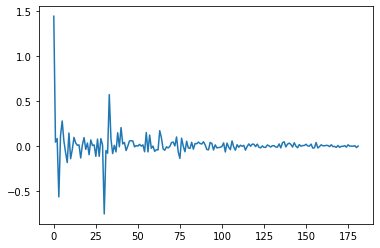

In [74]:
df_res4.err.plot()
plt.show()

# Box-Jenkins test to check model's goodness

In [75]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(sarimax_model.resid,lags=[1],return_df=True)['lb_pvalue'].values 
if pvalue < 0.05: 
    print("Reject H0. Bad model") 
else:
    print("Fail-to-Reject H0. Good model")
# LJung-Box test

Fail-to-Reject H0. Good model


 # Calculate error terms

In [76]:
# MSE
msg = 'SARIMAX Model. Order=(' + str(p) + ',' + str(q) + ')' 
mse1 = mean_squared_error(df_res4.actual, df_res4.predicted) 
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

SARIMAX Model. Order=(2,3)
	MSE = 0.021247327317056162
	RMSE = 0.1457646298559982


# Plot actual vs. predicted values

163 174


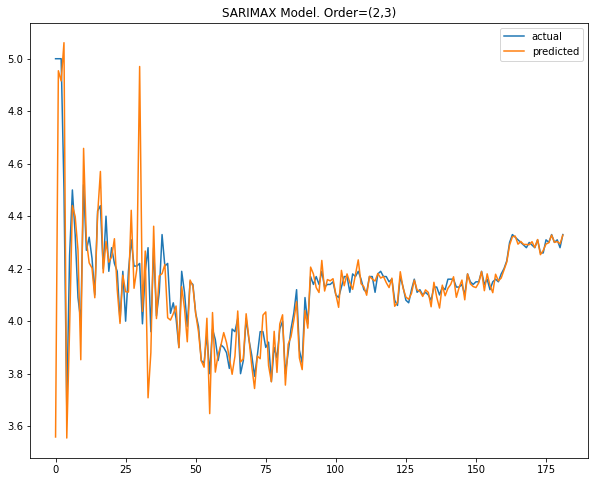

In [77]:
df_res4.actual.plot(figsize=(10,8),legend=True) 
df_res4.predicted.plot(legend=True) 
plt.title(msg)
print(len(train), len(train)+11)
plt.show()

 # Forecast the future data using the model

In [79]:
forecast_sarimax =sarimax_model.forecast(len(data), exog=exog_test.values)
forecast_sarimax

2014-08-31    4.815745
2014-09-30    4.781110
2014-10-31    4.694412
2014-11-30    4.743918
2014-12-31    3.808284
                ...   
2029-05-31    4.284820
2029-06-30    4.260302
2029-07-31    4.267107
2029-08-31    4.251642
2029-09-30    4.303700
Freq: M, Name: predicted_mean, Length: 182, dtype: float64

# Visualize the forecast

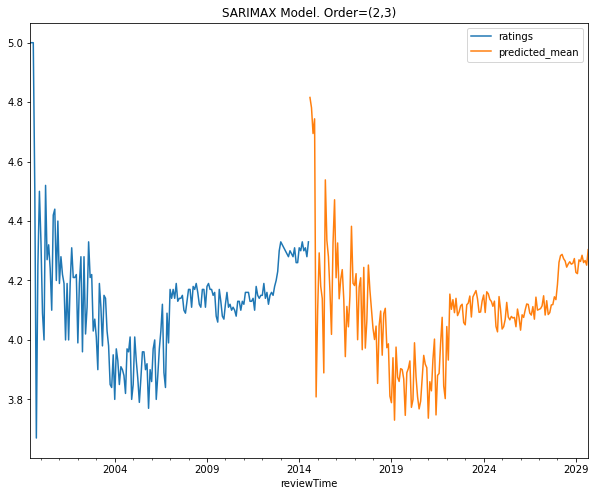

In [80]:
# forecast into the future
data.plot(figsize=(10,8),legend=True)
forecast_sarimax.plot(legend=True)
plt.title(msg)
plt.show()

# comparision of 4 models

# ARMA Model:

In [ ]:
Model:	ARIMA(1, 0, 1)
AIC	-80.613
BIC	-69.634
HQIC	-76.157

In [ ]:
ARMA Model. Order=(1,1)
	MSE = 0.09402863736836964
	RMSE = 0.3066408931769695

Model:	ARIMA(8, 0, 5)
AIC	-89.163
BIC	-47.989
HQIC	-72.451

ARIMA Model1. Order=(8,5)
	MSE = 0.03582833959340916
	RMSE = 0.18928375417190235

# ARIMA Model

Model:	ARIMA(8, 1,71

ARIMA Model. Order=(8,5)
	MSE = 0.03582833959340916
	RMSE = 0.18928375417190235

#  SARIMA Model

Model:	SARIMAX(8, 1, 5)x(1, 1, [1], 30)
AIC	-13.056
BIC	25.838
HQIC	2.579

SARIMA Model. Order=(8,5)
	MSE = 0.23076922436511169
	RMSE = 0.48038445474964286

#  SARIMAX Model

Model:	SARIMAX(8, 1, 5)x(1, 1, [1], 30)
AIC	-40.380
BIC	5.965
HQIC	-21.640

SARIMAX Model. Order=(8,5)
	MSE = 0.07098885096404418
	RMSE = 0.26643733027495264

# Conclusion:

lesser than AIC,BIC,MSE,RMSE value is better model

compare the above 4 model ARIMA is good one.

# Time Series 

In [81]:
df['category'].value_counts()

all electronics                         308291
home audio theater                      216600
camera photo                            187331
computers                               184407
cell phones accessories                  46272
car electronics                          15984
amazon devices                           15543
musical instruments                       6265
portable audio accessories                4177
office products                           4006
sports outdoors                           3802
tools home improvement                    3471
global positioning system navigation      1582
automotive                                1579
video games                               1188
amazon home                               1129
industrial scientific                      962
health personal care                       667
grocery                                    338
software                                   141
toys games                                 131
arts crafts s

In [87]:
all_electronics= df.loc[df['category'] == 'all electronics']
home_audio_theater= df.loc[df['category'] == 'home audio theater']
camera_photo = df.loc[df['category'] == 'camera photo']
computers = df.loc[df['category'] == 'computers']
cell_phones_accessories = df.loc[df['category'] == 'cell phones accessories']
car_electronics= df.loc[df['category'] == 'car electronics']
amazon_devices= df.loc[df['category'] == 'amazon devices']

In [88]:
all_electronics= all_electronics.sort_values('reviewTime')
home_audio_theater=home_audio_theater.sort_values('reviewTime')
camera_photo=camera_photo.sort_values('reviewTime')
computers=computers .sort_values('reviewTime')
cell_phones_accessories=cell_phones_accessories .sort_values('reviewTime')
car_electronics=car_electronics.sort_values('reviewTime')
amazon_devices=amazon_devices.sort_values('reviewTime')

In [89]:
all_electronics = all_electronics.groupby('reviewTime')['ratings'].mean().reset_index()
home_audio_theater = home_audio_theater.groupby('reviewTime')['ratings'].mean().reset_index()
camera_photo = camera_photo.groupby('reviewTime')['ratings'].mean().reset_index()
computers = computers.groupby('reviewTime')['ratings'].mean().reset_index()
cell_phones_accessories = cell_phones_accessories.groupby('reviewTime')['ratings'].mean().reset_index()
car_electronics= car_electronics.groupby('reviewTime')['ratings'].mean().reset_index()
amazon_devices =amazon_devices.groupby('reviewTime')['ratings'].mean().reset_index()

In [90]:
all_electronics = all_electronics.set_index('reviewTime')
home_audio_theater = home_audio_theater.set_index('reviewTime')
camera_photo = camera_photo.set_index('reviewTime')
computers =computers.set_index('reviewTime')
cell_phones_accessories =cell_phones_accessories .set_index('reviewTime')
car_electronics = car_electronics.set_index('reviewTime')
amazon_devices = amazon_devices.set_index('reviewTime')

In [94]:
y_all_electronics =all_electronics['ratings'].resample('M').mean()
y_home_audio_theater = home_audio_theater ['ratings'].resample('M').mean()
y_camera_photo= camera_photo['ratings'].resample('M').mean()
y_computers = computers['ratings'].resample('M').mean()
y_cell_phones_accessories = cell_phones_accessories['ratings'].resample('M').mean()
y_car_electronics = car_electronics['ratings'].resample('M').mean()
y_amazon_devices = amazon_devices['ratings'].resample('M').mean()

In [96]:
all_electronics1= pd.DataFrame({'reviewTime':y_all_electronics.index, 'ratings':y_all_electronics.values})
home_audio_theater1 = pd.DataFrame({'reviewTime': y_home_audio_theater.index, 'ratings': y_home_audio_theater.values})
camera_photo1 = pd.DataFrame({'reviewTime': y_camera_photo.index, 'ratings': y_camera_photo.values})
computers1 = pd.DataFrame({'reviewTime': y_computers.index, 'ratings': y_computers.values})
cell_phones_accessories1 = pd.DataFrame({'reviewTime': y_cell_phones_accessories.index, 'ratings': y_cell_phones_accessories.values})
car_electronic1 = pd.DataFrame({'reviewTime': y_car_electronics.index, 'ratings': y_car_electronics.values})
amazon_devices1 = pd.DataFrame({'reviewTime': y_amazon_devices.index, 'ratings': y_amazon_devices.values})

In [87]:
store=pd.merge(all_electronics1,electronics1,on=['reviewTime'],how='inner')
store

,reviewTime,ratings_x,ratings_y
0,2008-11-30,4.197917,5.000000
1,2008-12-31,4.206818,4.000000
2,2009-01-31,3.928997,3.000000
3,2009-02-28,3.983974,NaN
4,2009-03-31,3.733225,NaN
...,...,...,...
64,2014-03-31,4.187576,4.245079
65,2014-04-30,4.202975,3.901923
66,2014-05-31,4.187662,4.063492
67,2014-06-30,4.142118,3.995333


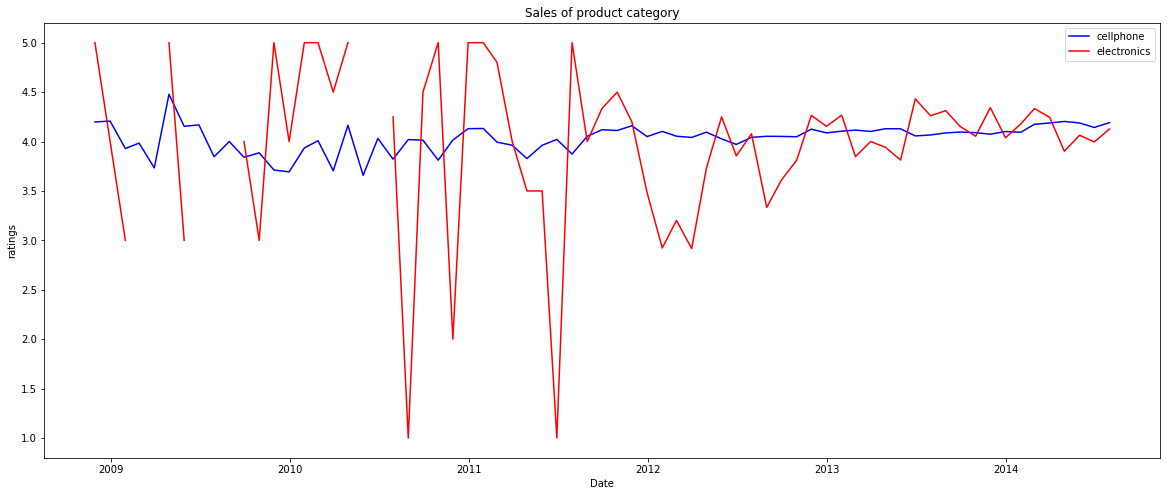

In [88]:
plt.figure(figsize=(20, 8))
plt.plot(store['reviewTime'], store['ratings_x'], 'b-', label = 'cellphone')
plt.plot(store['reviewTime'], store['ratings_y'], 'r-', label = 'electronics')
plt.xlabel('Date'); plt.ylabel('ratings'); plt.title('Sales of product category')
plt.legend();
plt.show()

In [89]:
store_final =store.interpolate(method='linear')
store_final

,reviewTime,ratings_x,ratings_y
0,2008-11-30,4.197917,5.000000
1,2008-12-31,4.206818,4.000000
2,2009-01-31,3.928997,3.000000
3,2009-02-28,3.983974,3.666667
4,2009-03-31,3.733225,4.333333
...,...,...,...
64,2014-03-31,4.187576,4.245079
65,2014-04-30,4.202975,3.901923
66,2014-05-31,4.187662,4.063492
67,2014-06-30,4.142118,3.995333


In [90]:
store_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   reviewTime  69 non-null     datetime64[ns]
 1   ratings_x   69 non-null     float64       
 2   ratings_y   69 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.2 KB


In [97]:
all_electronics1

,reviewTime,ratings
0,1999-07-31,5.000000
1,1999-08-31,5.000000
2,1999-09-30,4.500000
3,1999-10-31,3.500000
4,1999-11-30,4.666667
...,...,...
176,2014-03-31,4.346354
177,2014-04-30,4.290162
178,2014-05-31,4.358588
179,2014-06-30,4.293524


In [131]:
all_elec=all_electronics1.set_index('reviewTime')
all_elec

,ratings
reviewTime,
1999-07-31,5.000000
1999-08-31,5.000000
1999-09-30,4.500000
1999-10-31,3.500000
1999-11-30,4.666667
...,...
2014-03-31,4.346354
2014-04-30,4.290162
2014-05-31,4.358588


In [130]:
ss=int(0.9*len(all_elec))
traindata=all_elec.iloc[:ss]
testdata=all_elec.iloc[ss:]
print("train1={},test1={}".format(len(train1),len(test1)))
# from top to bottom

train1=162,test1=19


In [127]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima_elec = SARIMAX(traindata,order=(2,1,3), seasonal_order=(1,1,1,30)).fit()
model_sarima_elec.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              ratings   No. Observations:                  162
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 30)   Log Likelihood                  24.895
Date:                              Sun, 06 Mar 2022   AIC                            -33.789
Time:                                      22:32:22   BIC                            -10.787
Sample:                                  07-31-1999   HQIC                           -24.442
                                       - 12-31-2012                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3690      0.065     -5.673      0.000      -0.496      -0.241
ar.L2         -0.8671      0.073    -11.922      0.000      -1.010      -0.725
ma.L1         -0.2984      0.096     -3.093      0.002      -0.487      -0.109
ma.L2          0.5577      0.096      5.837      0.000       0.370       0.745
ma.L3         -0.7626      0.075    -10.207      0.000      -0.909      -0.616
ar.S.L30       0.3955      0.511      0.774      0.439      -0.607       1.398
ma.S.L30      -0.6401      0.550     -1.164      0.245      -1.718       0.438
sigma2         0.0384      0.005      7.744      0.000       0.029       0.048
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                17.46
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecast the future  cell phone product data using the model

In [128]:
fcast_sarima_elec = model_sarima_elec.predict(start=len(traindata), end=len(traindata)+12, typ='levels') 
print(fcast_sarima_elec)

2013-01-31    4.221637
2013-02-28    4.135973
2013-03-31    4.180680
2013-04-30    4.253030
2013-05-31    4.174982
2013-06-30    4.193522
2013-07-31    4.215811
2013-08-31    4.289105
2013-09-30    4.249897
2013-10-31    4.183114
2013-11-30    4.150712
2013-12-31    4.190528
2014-01-31    4.213462
Freq: M, Name: predicted_mean, dtype: float64


# visualize the forecast

<AxesSubplot:xlabel='reviewTime'>

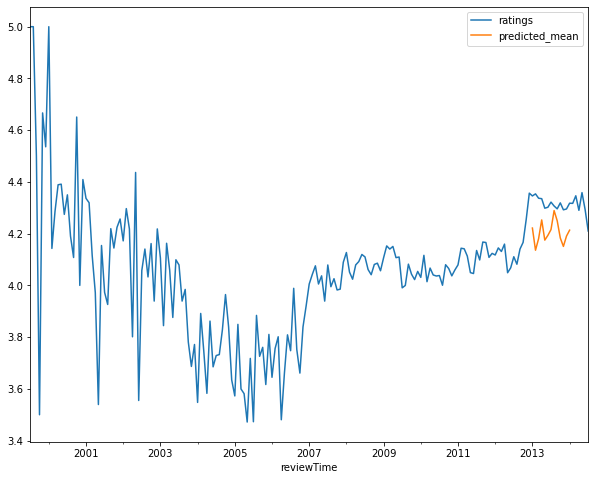

In [129]:
# forecast into the future
all_elec.plot(figsize=(10,8),legend=True)
fcast_sarima_elec.plot(legend=True)